# Comparison of 5x5 simulation results for alpha = 0, 0.5, 1 over 30 day time period.

In [61]:
import numpy as np
import xarray as xr
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

%matplotlib inline
plt.rcParams['image.cmap'] = 'Paired'
sns.set(font_scale =2)

In [62]:
# Parent directory for the results of this run
group_results_directory = '/data/jpetrie/MEOPAR/SalishSea/results/mesozoo_alpha_changes_30_day_2/'
tracer_file = 'SS5x5_1h_20150201_20150302_ptrc_T.nc'
individual_directories = []
alpha_vals = []
for file in os.listdir(group_results_directory):
    # All result directories for this run start with this string...
    if file.startswith("nampismezo_zz_rate_mesozoo_alpha_"):
        # ... and end with the value alpha was set to
        alpha = float(file.split("nampismezo_zz_rate_mesozoo_alpha_")[1])
        individual_directories.append(file)
        alpha_vals.append(alpha)


tracer_datasets = [xr.open_dataset(group_results_directory + '/' + file +'/' + tracer_file) for file in individual_directories]
dataset_dict = dict(zip(alpha_vals, tracer_datasets))

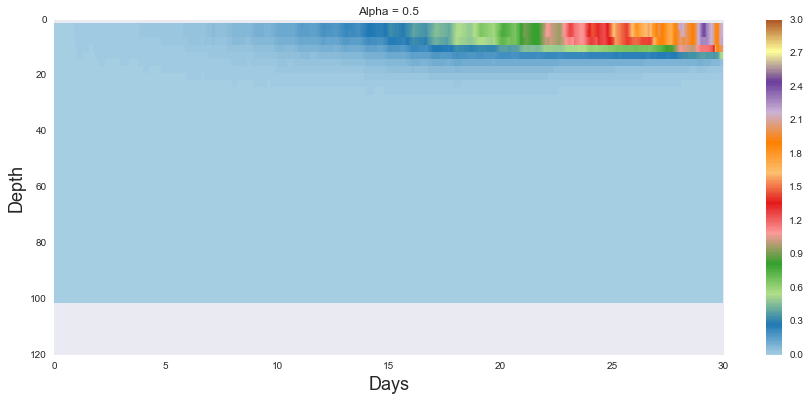

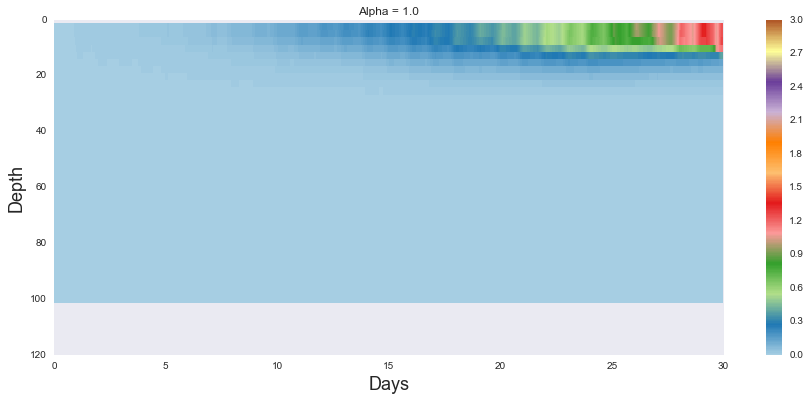

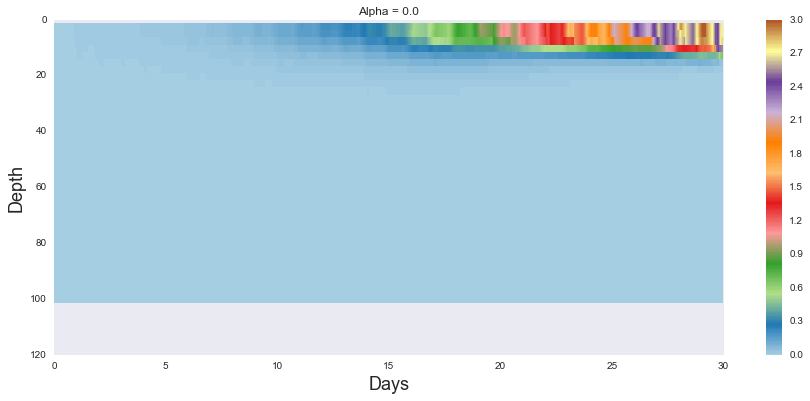

In [64]:
# Plot depth/time/PHY heatmap for each value of alpha
for alpha in dataset_dict:
    z = dataset_dict[alpha].deptht.values
    t= np.array([float(x) for x in dataset_dict[alpha].time_centered.values])
    tz,zt=np.meshgrid((t[:] - t[0])/10**9/3600/24,z[:])
    
    fig, ax = plt.subplots(1, 1,figsize=(15,6))
    mesh=plt.pcolormesh(tz,zt,dataset_dict[alpha].PHY.values[:,:,2,2].T, vmin = 0, vmax = 3)
    fig.colorbar(mesh)
    plt.gca().invert_yaxis()
    plt.title("Alpha = " + str(alpha))
    plt.xlabel("Days", size =18)
    plt.ylabel("Depth", size = 18)
    

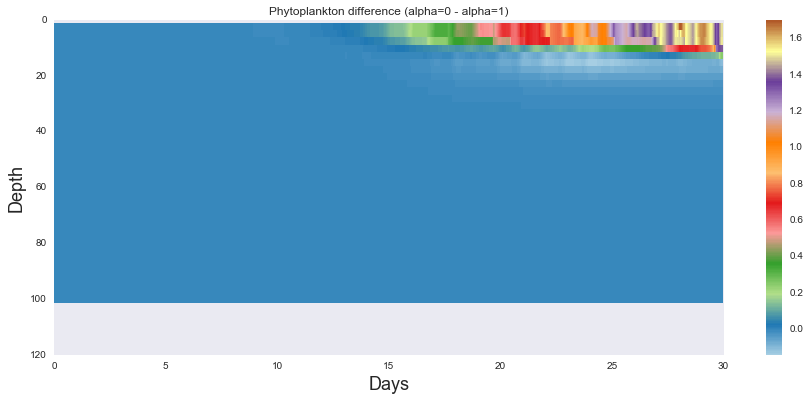

In [65]:
# Plot the difference in PHY concentration vs depth and time between alpha = 0 and alpha = 1
fig, ax = plt.subplots(1, 1,figsize=(15,6))
mesh=plt.pcolormesh(tz,zt,dataset_dict[0].PHY.values[:,:,2,2].T - dataset_dict[1].PHY.values[:,:,2,2].T)
fig.colorbar(mesh)
plt.gca().invert_yaxis()
plt.title("Alpha = " + str(alpha))
plt.xlabel("Days", size =18)
plt.ylabel("Depth", size = 18)
plt.title("Phytoplankton difference (alpha=0 - alpha=1)")

In [90]:
# Convert list of xarrays to a single pandas dataframe. Easier to manipulate and plot
dataframe_list = []
for alpha in dataset_dict:
    df = dataset_dict[alpha].to_dataframe()
    df['ALPHA'] = alpha
    dataframe_list.append(df)

df = pd.concat(dataframe_list)

df_subset = df.query('x == 2 and y == 2 and axis_nbounds == 0') # Subset for certain grids of the 5x5
df_subset.reset_index(inplace=True) # Get rid of that multiindex madness

In [113]:
# Check that all grid heights are the same. More work to do if they are not
mesh_mask = xr.open_dataset(group_results_directory + "nampismezo_zz_rate_mesozoo_alpha_0/" + "mesh_mask.nc")
grid_heights = mesh_mask.e3t_1d.values

# Create a dataframe with depth averaged tracer values. If all grid heights are the same this is the mean value
if(len(np.unique(grid_heights)) == 1 ):
    depth_averaged = df_subset.groupby(['time_counter','ALPHA','x','y']).mean()
    depth_averaged.reset_index(inplace=True)

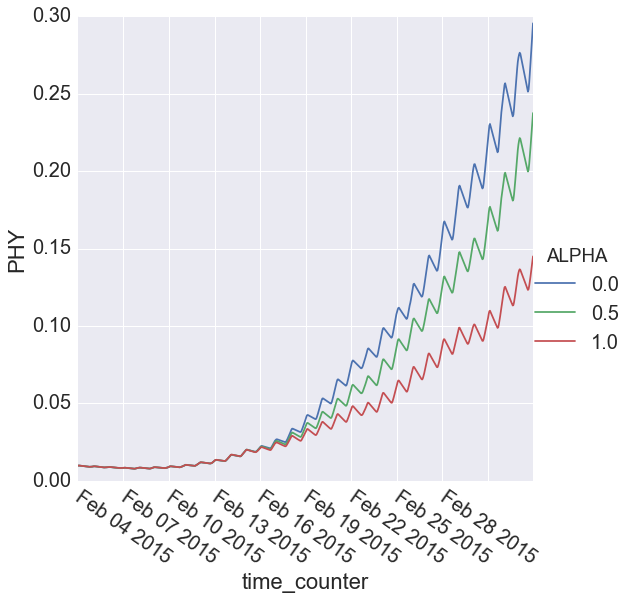

In [114]:
# Plot depth averaged PHY concentration vs. time
fg = sns.FacetGrid(data=depth_averaged, hue='ALPHA',size =8)
fg.map(plt.plot, 'time_counter', 'PHY').add_legend()
fg.set_xticklabels(rotation=-35)

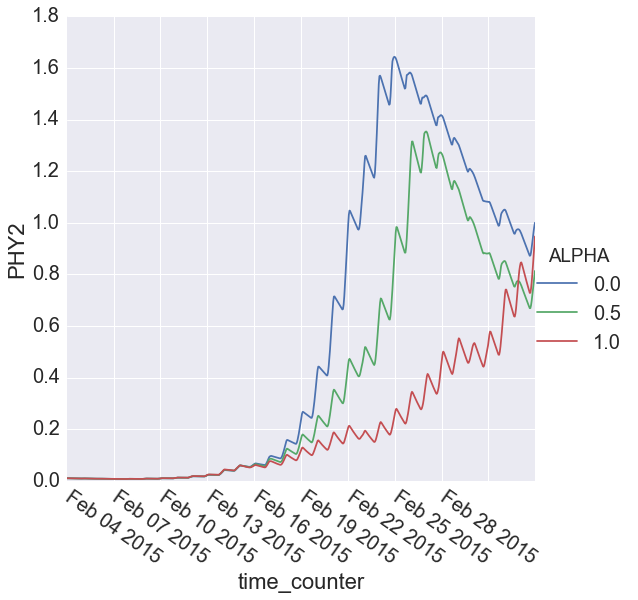

In [115]:
# Plot depth averaged PHY2 concentration vs. time
fg = sns.FacetGrid(data=depth_averaged, hue='ALPHA',size = 8)
fg.map(plt.plot, 'time_counter', 'PHY2').add_legend()
fg.set_xticklabels(rotation=-35)

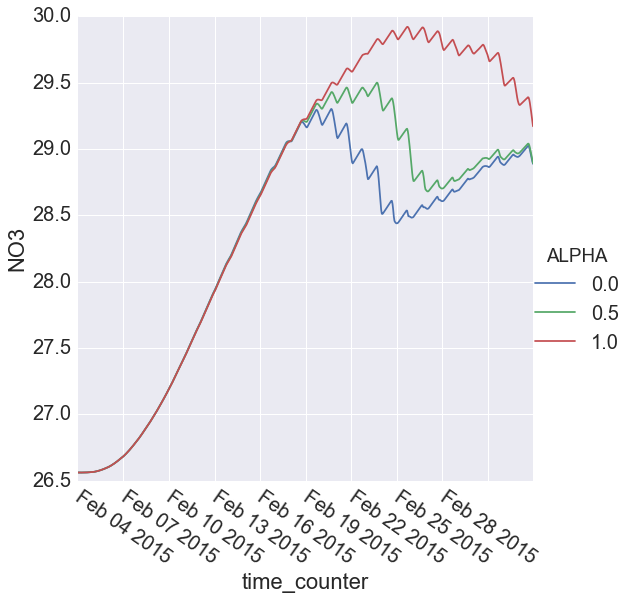

In [116]:
# Plot depth averaged NO3 concentration vs. time
fg = sns.FacetGrid(data=depth_averaged, hue='ALPHA',size = 8)
fg.map(plt.plot, 'time_counter', 'NO3').add_legend()
fg.set_xticklabels(rotation=-35)